# Magyar üzemanyagárak alakulása 2015-2019

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

/var/folders/d6/nn_w59y533jd4df454dl93dw0000gn/T/ipykernel_84908/271160569.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").mean()


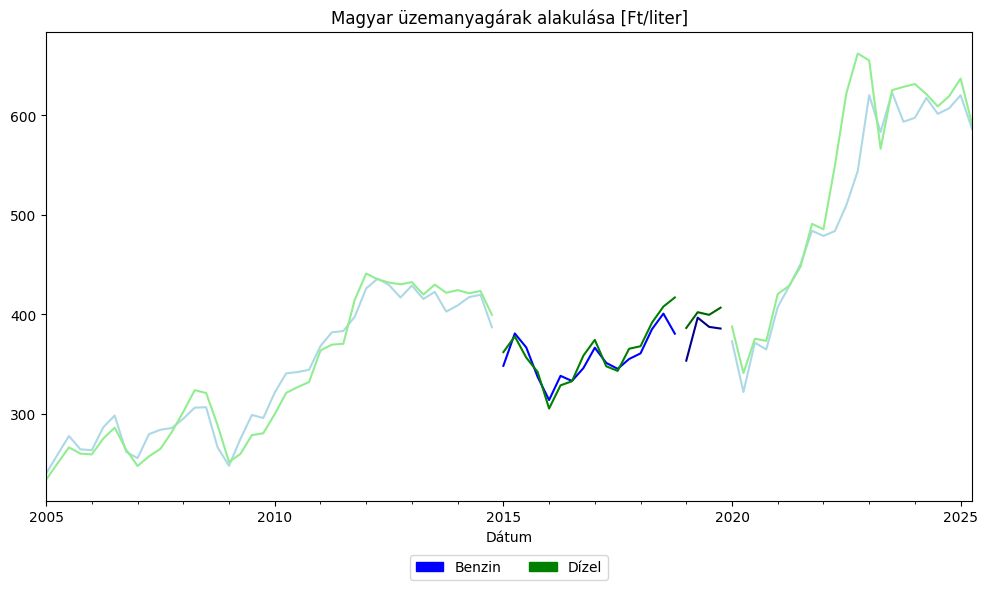

In [14]:
PROCESSED_DIR: Path = Path("../data/processed")

file_path = PROCESSED_DIR / "petrol_prices.csv"
df = pd.read_csv(
    file_path,
    parse_dates=["Dátum"],
    index_col="Dátum",
)
df = df.sort_index(ascending=True)
df = df.resample("Q").mean()

df_pre = df.loc[:"2014"]
df_train = df.loc["2015":"2018"]
df_test = df.loc["2019"]
df_post = df.loc["2020":]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Magyar üzemanyagárak alakulása [Ft/liter]")

df_pre.plot(style=['-', '-'], ax=ax, color=["lightblue", "lightgreen"], legend=False)
df_train.plot(style=['-', '-'], ax=ax, color=["blue", "green"], legend=False)
df_test.plot(style=['-', '-'], ax=ax, color=["darkblue", "darkgreen"], legend=False)
df_post.plot(style=['-', '-'], ax=ax, color=["lightblue", "lightgreen"], legend=False)

# Create custom legend entries
import matplotlib.patches as mpatches
benzin_patch = mpatches.Patch(color='blue', label='Benzin')
dizel_patch = mpatches.Patch(color='green', label='Dízel')

ax.legend(handles=[benzin_patch, dizel_patch], bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=2)
plt.tight_layout()
plt.savefig("../docs/abrak/petrol_prices.png", dpi=300, bbox_inches='tight')
plt.show()